Họ và Tên: Bùi Thị Thanh Phương


MSSV:20110280

Lab-01

In [1]:
# mount data from google drive to colab
from google.colab import drive
drive.mount('/content/drive')

#import library
import pandas as pd # pandas 
import numpy as np # numpy

Mounted at /content/drive


In [2]:
# read data using Pandas DataFrame
data = pd.read_csv("./final_house_loan.csv")
data.head()

,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
0,F,19,1641.25,Low,1651.25,Rural,59641.82,21026.420753
1,M,29,1989.71,Low,1990.71,Urban,179858.51,60595.183366
2,F,37,1849.91,Low,1856.91,Rural,117297.62,39181.648002
3,M,65,2735.18,High,2747.18,Rural,354417.72,128497.710865
4,F,62,4741.78,High,4740.78,Urban,82049.80,39386.919336


#Visualize some information of data

In [3]:
data.describe()

,Age,Income (USD),Property Age,Property Price,Loan Sanction Amount (USD)
count,47297.000000,47265.000000,47263.000000,4.729700e+04,47297.000000
mean,40.000063,2586.684384,2586.611058,1.350880e+05,46487.229765
std,16.086128,1558.768809,1558.842286,9.457875e+04,32549.905634
min,18.000000,372.700000,370.700000,7.859620e+03,254.586578
25%,24.000000,1653.740000,1652.820000,6.250408e+04,21782.822159
50%,40.000000,2245.480000,2244.810000,1.130936e+05,38822.132402
75%,55.000000,3128.560000,3128.380000,1.819546e+05,62612.236905
max,65.000000,54662.750000,54647.750000,1.077967e+06,366131.165218


In [4]:
# Null checking
data.isnull().sum()

Gender                         0
Age                            0
Income (USD)                  32
Income Stability              12
Property Age                  34
Property Location              3
Property Price                 0
Loan Sanction Amount (USD)     0
dtype: int64

Nhận xét: Ta chận thấy các giá tri null rất nhỏ so với data nên ta bỏ null

In [5]:
#Loại bỏ null
data = data.dropna()

In [6]:
print("Sample size:", len(data))
data = data.dropna()
print("Not null sample size:", len(data))

Sample size: 47251
Not null sample size: 47251


Nhận xét: đã loại bỏ hết giá trị null trong data

<Axes: xlabel='Loan Sanction Amount (USD)', ylabel='Count'>

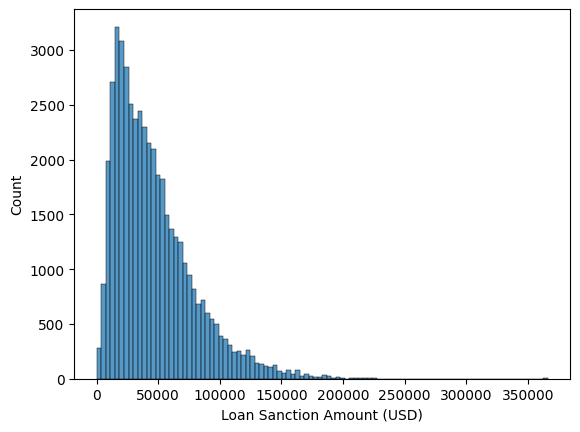

In [7]:
import seaborn as sns
sns.histplot(x="Loan Sanction Amount (USD)", data=data, bins=100)

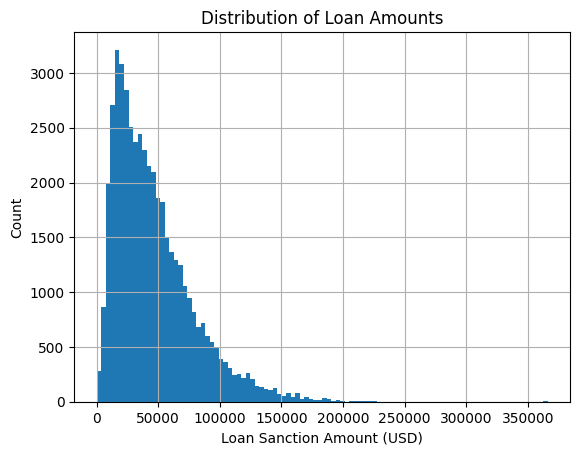

In [8]:
import matplotlib.pyplot as plt
# plot a histogram of the LoanAmount column
data["Loan Sanction Amount (USD)"].hist(bins=100)
plt.title("Distribution of Loan Amounts")
plt.xlabel("Loan Sanction Amount (USD)")
plt.ylabel("Count")
plt.show()

##Normalize Data to train linear regression model


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [10]:
# Normalize the input features using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(data[['Loan Sanction Amount (USD)']])
y = scaler.fit_transform(data[['Income (USD)']])


Cách khác

In [11]:
def normalize_data(df):
  normalized_data = data.copy()
  normalized_data["Gender"] = normalized_data["Gender"].apply(lambda x: 0 if x=="M" else 1)
  normalized_data["Income Stability"] = normalized_data["Income Stability"].apply(lambda x: 0 if x=="Low" else 1)
  normalized_data["Property Location"] = normalized_data["Property Location"].apply(lambda x: 0 if x=="Rural" else 1 if x=="Urban" else 2 )
  return normalized_data
normalized_data = normalize_data(data.copy())

In [12]:
# Correlation
normalized_data.corr()

,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
Gender,1.000000,-0.007706,0.002445,-0.019000,0.002512,-0.006358,-0.005931,-0.003396
Age,-0.007706,1.000000,-0.044086,0.455855,-0.044085,0.006048,-0.003274,-0.000115
Income (USD),0.002445,-0.044086,1.000000,-0.080961,0.999986,0.004057,0.358110,0.392897
Income Stability,-0.019000,0.455855,-0.080961,1.000000,-0.081008,0.008056,-0.004813,0.070969
Property Age,0.002512,-0.044085,0.999986,-0.081008,1.000000,0.004050,0.358110,0.392892
Property Location,-0.006358,0.006048,0.004057,0.008056,0.004050,1.000000,-0.001008,-0.003714
Property Price,-0.005931,-0.003274,0.358110,-0.004813,0.358110,-0.001008,1.000000,0.994429
Loan Sanction Amount (USD),-0.003396,-0.000115,0.392897,0.070969,0.392892,-0.003714,0.994429,1.000000


<Axes: >

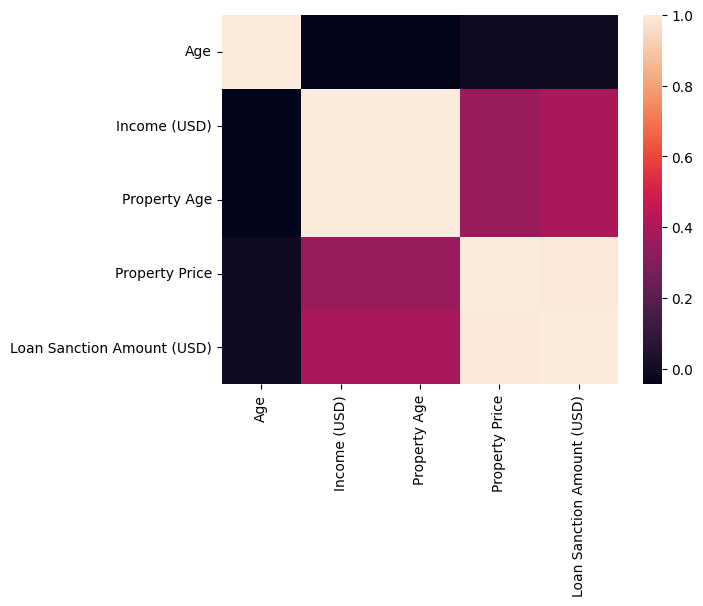

In [13]:
# Heatmap
import seaborn as sns
sns.heatmap(data.corr())

In [14]:
def prepare_X_y(df):
    columns = df.columns.tolist()
    columns.remove('Loan Sanction Amount (USD)')
    X = df[columns]
    y = df['Loan Sanction Amount (USD)'] 
    return X, y

X, y = prepare_X_y(normalized_data)

In [15]:
from sklearn.model_selection import train_test_split
def split_train_test(X, y, train_size=0.7):# tách tập train - test
    trainX, testX ,trainY, testY = train_test_split(X, y, train_size=train_size, random_state=2023)# random state : điểm bắt đầu gõ đại 1 số 
    # Use sklearn train_test_split to split X and y into 2 sets: train set and test set. With train_size is the proportion of train_set and fix the random_state with a number
    print('Training:' + str(trainX.shape))
    print('Test:' + str(testX.shape))
#in ra số hàng số cột
    return trainX, testX ,trainY, testY

In [16]:
TRAIN_SIZE = 0.7

trainX, testX ,trainY, testY = split_train_test(X, y, train_size=TRAIN_SIZE)

Training:(33075, 7)
Test:(14176, 7)


#Train linear regression model and show the model's intercepts, coeficients

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
model = LinearRegression(fit_intercept=True)  

In [19]:
model.fit(trainX, trainY)

LinearRegression()

In [20]:
print(model.coef_ ) # print coefficient
print()
print(model.intercept_) # print intercept_

[ 2.34134013e+02 -7.93269954e+01  5.26234320e-01  1.11433564e+04
  4.98904658e-01 -1.34128659e+02  3.36336980e-01]

592.098981897725


In [21]:
# Compare on training dataset
pred = model.predict(trainX) #Kiểm tra lại check lịa,
trainset_LinearRegression = mean_absolute_error(y_pred=pred, y_true=trainY)# sai số trung bình giứa train và test
print("mean absolute error of linear model on train set ", trainset_LinearRegression )
pred = model.predict(testX)   
testset_LinearRegression = mean_absolute_error(y_pred=pred, y_true=testY)
print("mean absolute error of linear model on test set ", testset_LinearRegression )


mean absolute error of linear model on train set  140.21822175326272
mean absolute error of linear model on test set  114.29037846050205


In [22]:
from sklearn.linear_model import Lasso


def build_lasso_model(X, y):
  model = Lasso(alpha=0.1)
  model.fit(X, y)
    # Todo: use sklearn model and config your parameters
    # Todo: fit your model with X, y
  return model

model = build_lasso_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(trainX)   
trainset_Lasso = mean_absolute_error(y_pred=pred, y_true=trainY)
print("mean absolute error of linear model on train set ", trainset_Lasso )
pred = model.predict(testX)   
testset_Lasso = mean_absolute_error(y_pred=pred, y_true=testY)
print("mean absolute error of linear model on test set ", testset_Lasso )

print(model.coef_) # print coefficient
print()
print(model.intercept_) # print intercept_

mean absolute error of linear model on train set  140.33618892820755
mean absolute error of linear model on test set  114.40452017292044
[ 2.33757197e+02 -7.93129543e+01  8.55773010e-01  1.11416601e+04
  1.69374346e-01 -1.33991678e+02  3.36337032e-01]

591.6988567521985


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.246e+10, tolerance: 3.490e+09
  model = cd_fast.enet_coordinate_descent(


In [23]:
from sklearn.linear_model import Ridge


def build_ridge_model(X, y):
    model = model = Ridge(alpha=0.1)
    model.fit(X, y)
    # Todo: use sklearn model and config your parameters
    # Todo: fit your model with X, y

    return model

model = build_ridge_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(trainX)   
trainset_Ridge = mean_absolute_error(y_pred=pred, y_true=trainY)
print("mean absolute error of linear model on train set ", trainset_Ridge )
pred = model.predict(testX)   
testset_Ridge = mean_absolute_error(y_pred=pred, y_true=testY)
print("mean absolute error of linear model on test set ", testset_Ridge )

print(model.coef_) # print coefficient
print()
print(model.intercept_) # print intercept_

mean absolute error of linear model on train set  140.25580812766657
mean absolute error of linear model on test set  114.32671758194246
[ 2.34126944e+02 -7.93227634e+01  5.26366558e-01  1.11428249e+04
  4.98766001e-01 -1.34127658e+02  3.36337012e-01]

591.9914517315556


In [24]:
from sklearn.linear_model import ElasticNet


def build_elastic_model(X, y):
    model = model = ElasticNet(alpha=0.001, l1_ratio=0.5)
    model.fit(X, y)
    # Todo: use sklearn model and config your parameters
    # Todo: fit your model with X, y

    return model

model = build_elastic_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(trainX)   
trainset_ElasticNet = mean_absolute_error(y_pred=pred, y_true=trainY)
print("mean absolute error of linear model on train set ", trainset_ElasticNet )
pred = model.predict(testX)   
testset_ElasticNet = mean_absolute_error(y_pred=pred, y_true=testY)
print("mean absolute error of linear model on test set ", testset_ElasticNet )

print(model.coef_) # print coefficient
print()
print(model.intercept_) # print intercept_


mean absolute error of linear model on train set  148.834235766809
mean absolute error of linear model on test set  122.90958028656515
[ 2.33003021e+02 -7.86315541e+01  8.56543273e-01  1.10560479e+04
  1.67568213e-01 -1.33971436e+02  3.36342182e-01]

574.3433316668816


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.383e+10, tolerance: 3.490e+09
  model = cd_fast.enet_coordinate_descent(


## Comparision

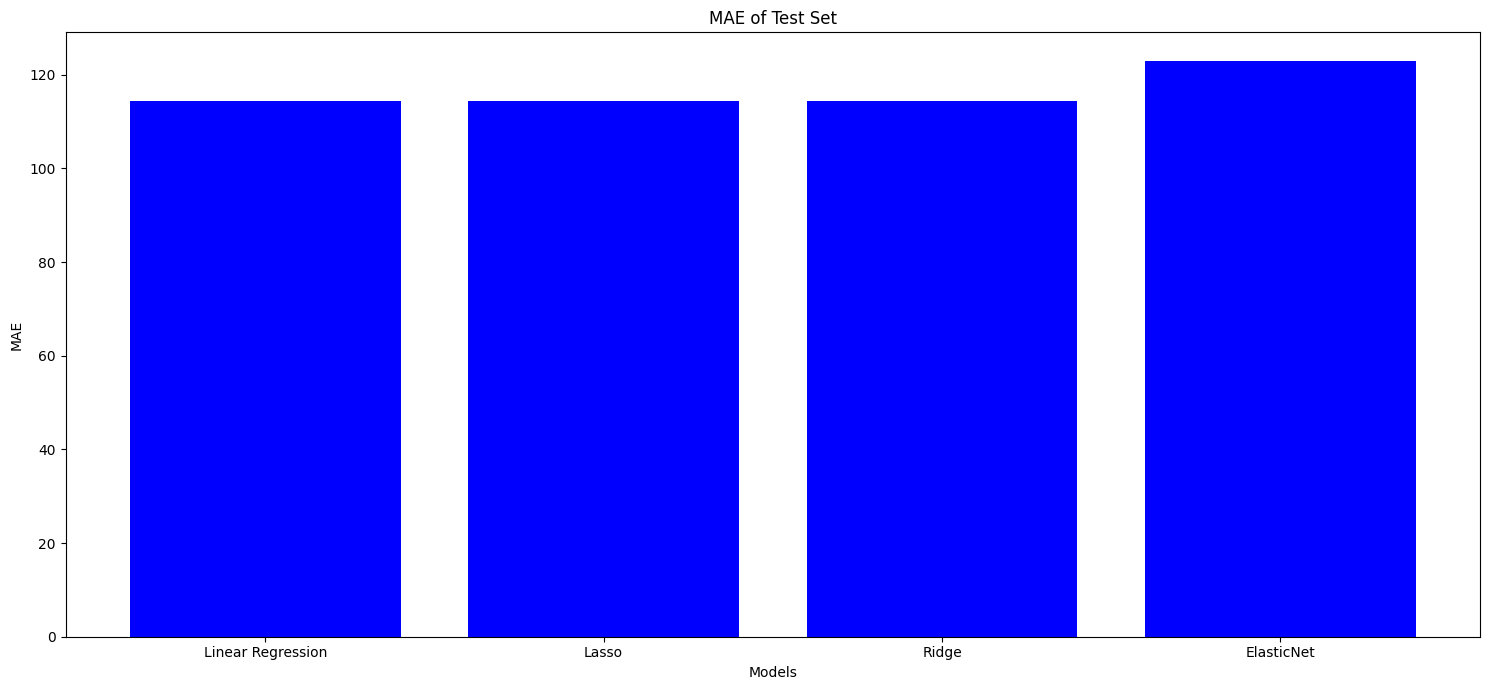

In [25]:
import matplotlib.pyplot as plt

# Define the models and their test set MAE
models = ['Linear Regression', 'Lasso', 'Ridge', 'ElasticNet']
test_mae = [testset_LinearRegression, testset_Lasso, testset_Ridge, testset_ElasticNet]

# Create the plot
fig, ax = plt.subplots(figsize=(15, 7))
ax.bar(models, test_mae, color='blue')

# Set the plot title, x-axis label, and y-axis label
ax.set_title('MAE of Test Set')
ax.set_xlabel('Models')
ax.set_ylabel('MAE')

# Add spacing between the subplots
plt.tight_layout()

# Show the plot
plt.show()

## Polynomial Transform 

When the data feature does not conform to a linear function, a linear regression cannot be applied directly to the original data. Then, there are many possibilities that the data feature conforms to the polynomial function. Scikit-Learn supports converting data features to polynomials through ``PolynomialFeatures``.

$$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots
$$

The formula above uses the transformation of the value $x$ from one dimension to the other, with the aim of being able to use linear regression to find complex relationships between $x$ and $y$.

In [26]:
#Linear Regression with Polynomial Transform
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def build_pipeline(X, y):
    poly_model = make_pipeline(PolynomialFeatures(2, include_bias=False), LinearRegression()) 
    # use make_pipeline to apply PolynomialFeatures and a Regression model train your dataset
    poly_model.fit(X, y)  

    return poly_model

poly_model = build_pipeline(trainX, trainY)
# Compare on training dataset
poly_pred = poly_model.predict(trainX)   
print("mean absolute error of linear model (with poly transform) on train set ", mean_absolute_error(y_pred=poly_pred, y_true=trainY) )

poly_pred = poly_model.predict(testX)
print("mean absolute error of linear model (with poly transform) on test set ", mean_absolute_error(y_pred=poly_pred, y_true=testY))

mean absolute error of linear model (with poly transform) on train set  160.54729654830476
mean absolute error of linear model (with poly transform) on test set  134.84421846949314


In [27]:
#Linear Regression with Polynomial Transform
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def build_pipeline(X, y):
    poly_model = make_pipeline(PolynomialFeatures(4, include_bias=False), LinearRegression()) 
    # use make_pipeline to apply PolynomialFeatures and a Regression model train your dataset
    poly_model.fit(X, y)  

    return poly_model

poly_model = build_pipeline(trainX, trainY)
# Compare on training dataset
poly_pred = poly_model.predict(trainX)   
print("mean absolute error of linear model (with poly transform) on train set ", mean_absolute_error(y_pred=poly_pred, y_true=trainY) )

poly_pred = poly_model.predict(testX)
print("mean absolute error of linear model (with poly transform) on test set ", mean_absolute_error(y_pred=poly_pred, y_true=testY))

mean absolute error of linear model (with poly transform) on train set  2787.146779077147
mean absolute error of linear model (with poly transform) on test set  2798.5986368653844


In [28]:
#Linear Regression with Polynomial Transform
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def build_pipeline(X, y):
    poly_model = make_pipeline(PolynomialFeatures(5, include_bias=False), LinearRegression()) 
    # use make_pipeline to apply PolynomialFeatures and a Regression model train your dataset
    poly_model.fit(X, y)  

    return poly_model

poly_model = build_pipeline(trainX, trainY)
# Compare on training dataset
poly_pred = poly_model.predict(trainX)   
print("mean absolute error of linear model (with poly transform) on train set ", mean_absolute_error(y_pred=poly_pred, y_true=trainY) )

poly_pred = poly_model.predict(testX)
print("mean absolute error of linear model (with poly transform) on test set ", mean_absolute_error(y_pred=poly_pred, y_true=testY))

mean absolute error of linear model (with poly transform) on train set  5385.708125826286
mean absolute error of linear model (with poly transform) on test set  5392.254676949384
